In [2]:
!pip install missingno

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import missingno as msno
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
df_raw = pd.read_csv('C:\\Users\\user\\Downloads\\0821_v1_data.csv', encoding='CP949')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14956 entries, 0 to 14955
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14956 non-null  object 
 1   burnout60         14956 non-null  object 
 2   area              14956 non-null  int64  
 3   gender            14956 non-null  int64  
 4   age               14956 non-null  int64  
 5   wduration_y       14956 non-null  int64  
 6   earning1          14956 non-null  int64  
 7   earning2_r        14956 non-null  int64  
 8   wtime_r           14956 non-null  float64
 9   woutside4_1       14956 non-null  int64  
 10  wtime_length5     14956 non-null  int64  
 11  age_group         14956 non-null  int64  
 12  emp_period_group  14956 non-null  int64  
 13  wtime_group       14956 non-null  int64  
 14  compsize_group    14956 non-null  int64  
 15  woutside_group    14956 non-null  int64  
 16  compsize_group2   14956 non-null  int64 

<Axes: >

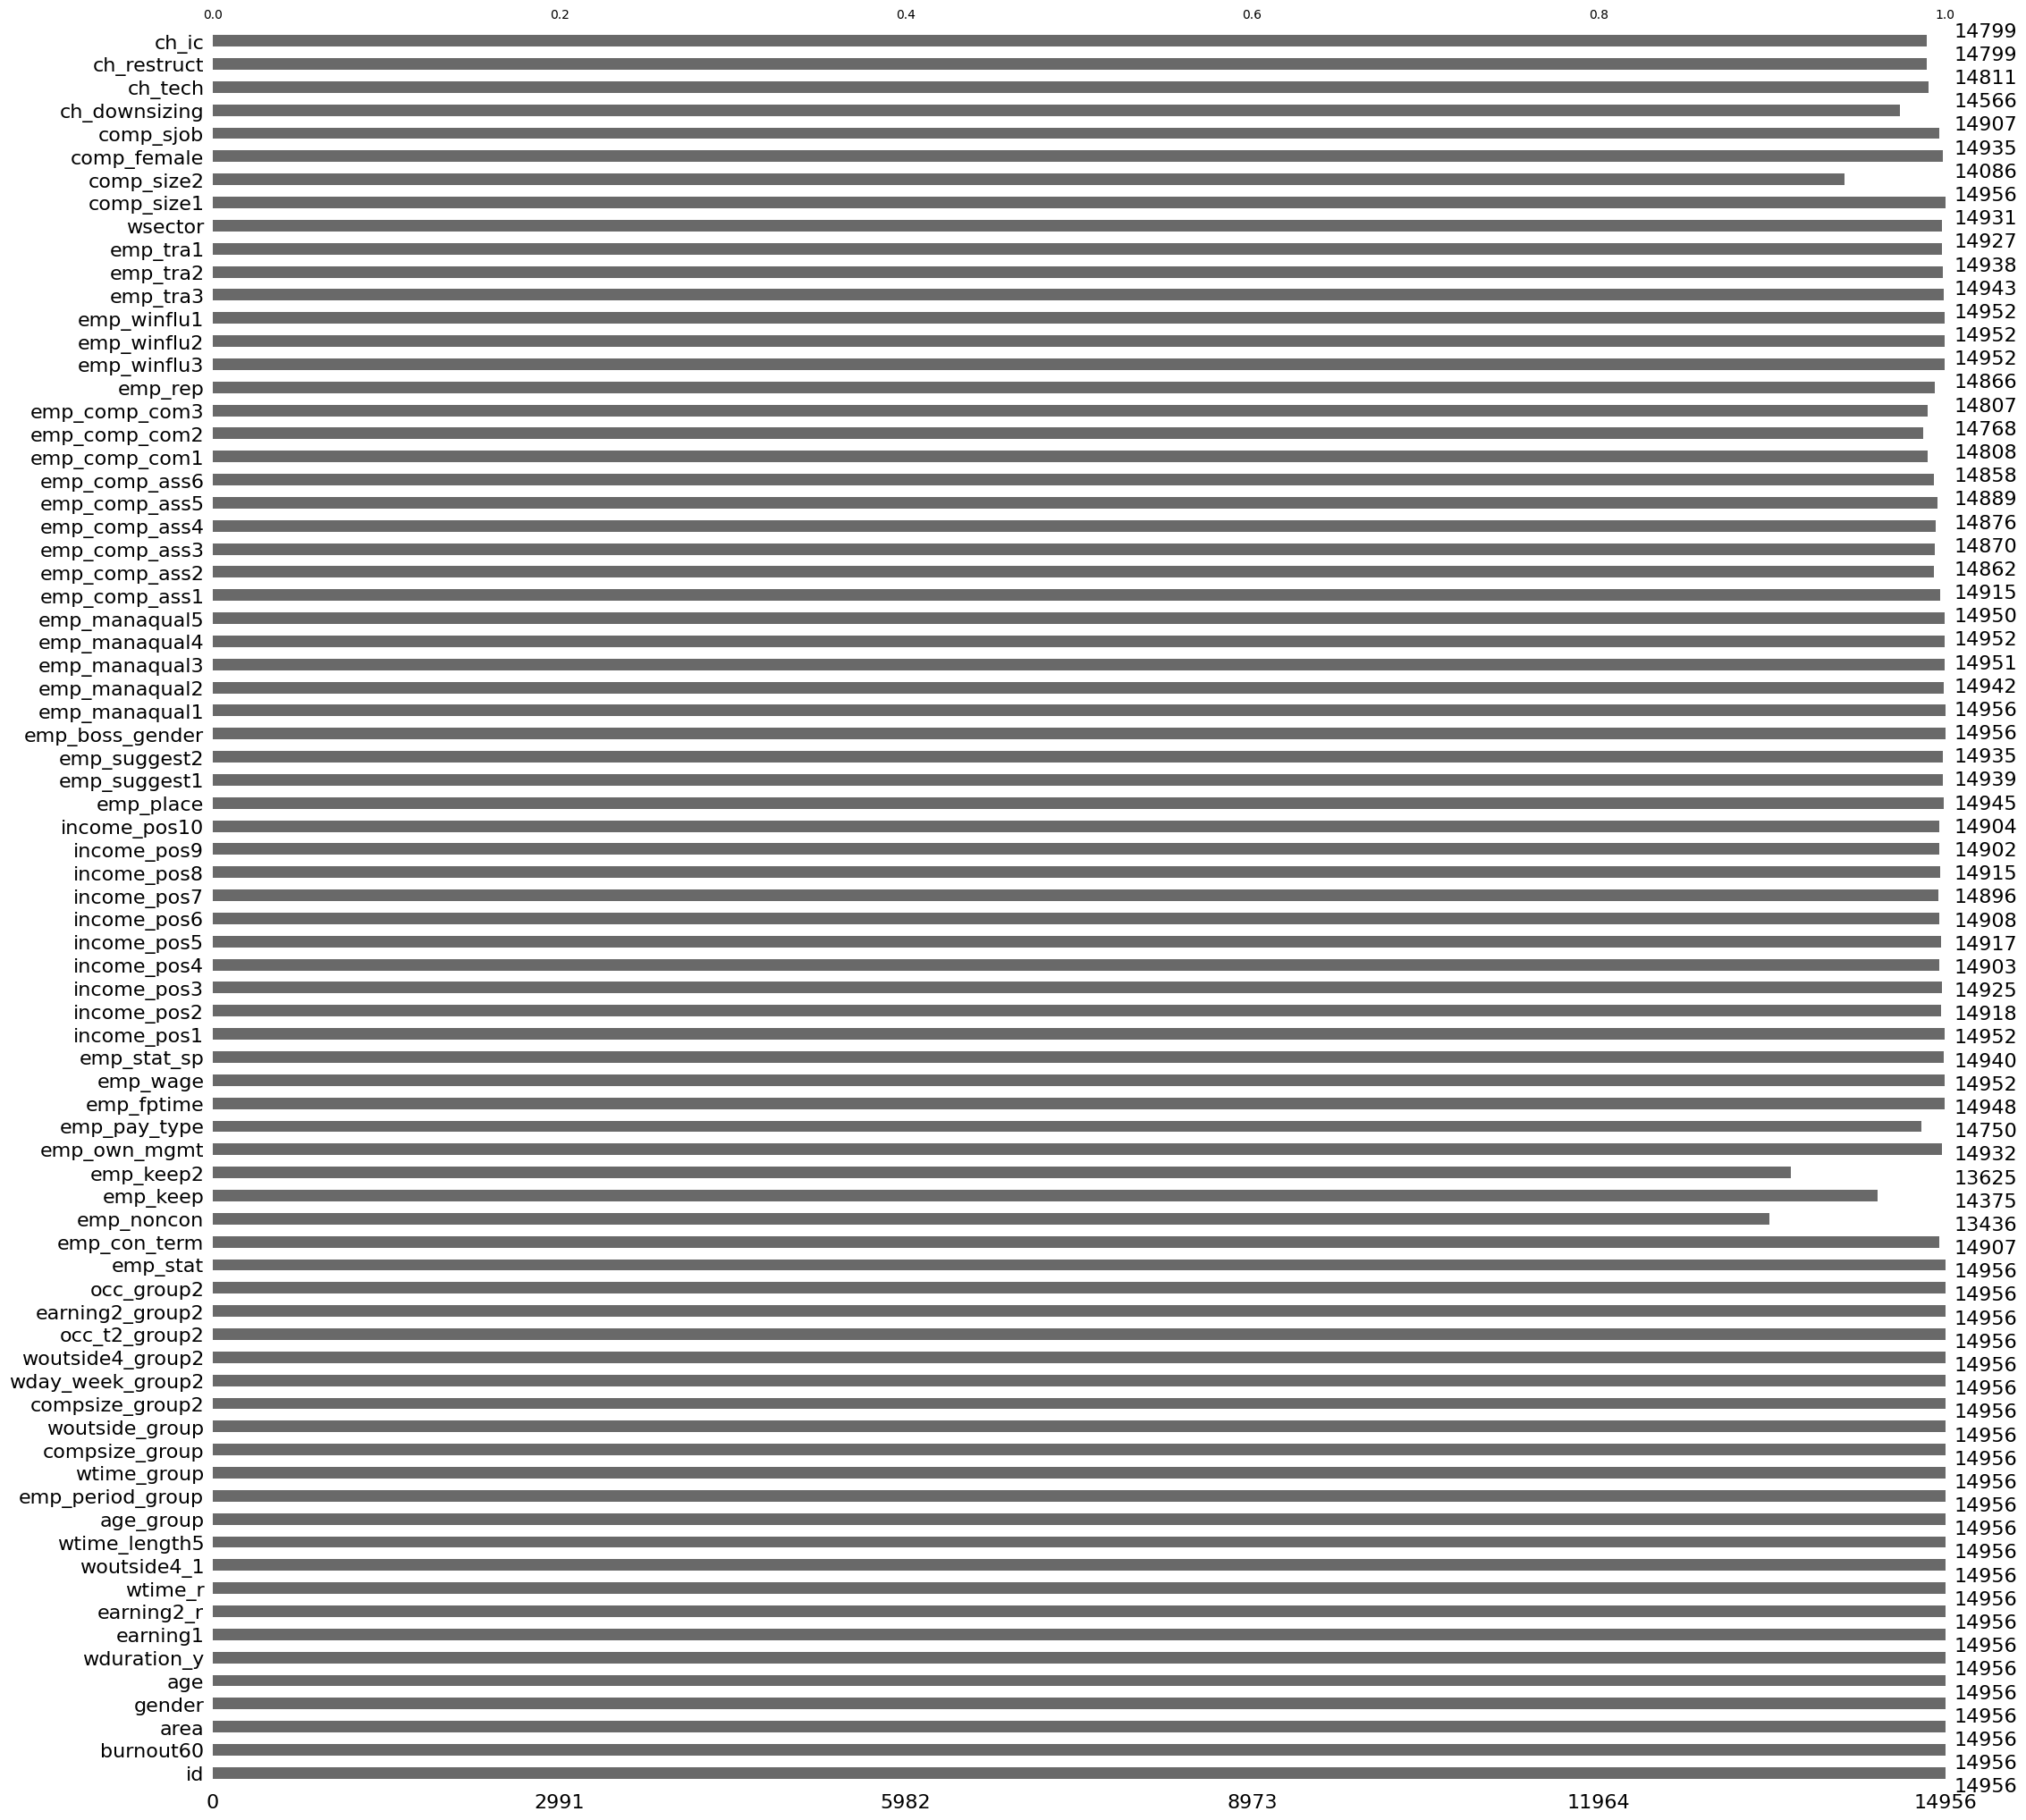

In [6]:
msno.bar(df_raw)

In [ ]:
#### SHAP
top_features = f_top.head(15).index.tolist()
# 클래스 이진으로 수정
df['burnout60'] = df['burnout60'].replace(2, 0)
df['burnout60'] = df['burnout60'].replace(1, 0)
df['burnout60'] = df['burnout60'].replace(3, 1)
df['burnout60']
# 선택한 변수를 활용해서 다시 모델에 넣기

# 전체 데이터
X_new = X[top_features]
y = df['burnout60']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

In [ ]:
#### LightGBM
from sklearn.model_selection import cross_validate
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)
print(scores)
# 훈련 전체 데이터로 학습
lgb.fit(X_train, y_train)
final_model = lgb.fit(X_train, y_train)
import shap
explainer = shap.TreeExplainer(final_model)
shap_values = explainer(X_train)
shap_values
# 해석 교수님 피드백 받기
shap.summary_plot(shap_values, X_train)
print(shap_values.shape)
# shap_values_class2 = shap_values[:, :, 2]
# print(shap_values_class2.shape)
shap.summary_plot(shap_values_class2, X_train)